In [2]:
import photontorch as pt
import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Ring(pt.Network):
    def __init__(self, wavelength=1.55e-6, phase=0, neff=2.34, loss=0):
        super(Ring, self).__init__()
        self.neff = neff
        self.wavelength = wavelength
        self.wg_length = wavelength / (self.neff * 2)*10# 单个直波导的长度
        self.loss = loss
        self.phase = phase
        self.add_component("dc1", pt.DirectionalCoupler(coupling=0.01, trainable=False))
        self.add_component("dc2", pt.DirectionalCoupler(coupling=0.01, trainable=False))
        self.add_component("wg1", pt.Waveguide(length = self.wg_length, loss=self.loss, phase = 0, trainable = False, neff=self.neff))
        self.add_component("wg2", pt.Waveguide(length = self.wg_length, loss=self.loss, phase = self.phase, trainable = True, neff=self.neff)) 
        self.add_component("source", pt.Source())
        self.add_component("detector1", pt.Detector())
        self.add_component("detector2", pt.Detector())
        self.add_component("term", pt.Term())
        self.link("source:0", "0:dc1:3", "0:wg1:1", "0:dc2:1", "1:wg2:0", "2:dc1:1", "0:detector1")
        self.link("detector2:0", "3:dc2:2", "0:term")

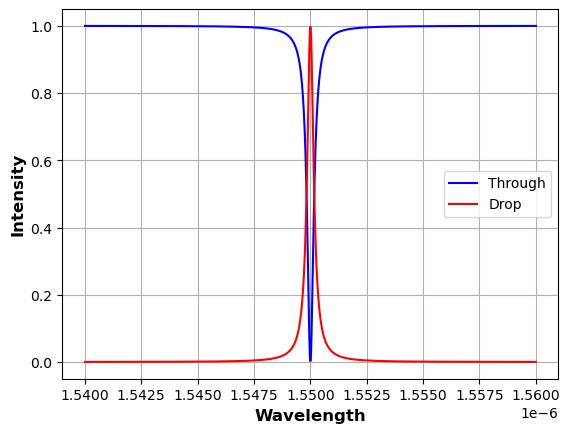

In [7]:
wavelength_list = 1e-6 * np.linspace(1.54, 1.56, 1000)
env = pt.Environment(t_start = 0, t_end = 1e-12, dt = 5e-13, wl = wavelength_list, grad=False, freqdomain=True)
with env:
    detected_through = []
    detected_drop = []
    ring = Ring(wavelength=1.55e-6, neff=2.34, phase=0, loss=0)
    detected = ring(source = 1)[-1, :, :, 0]
    detected_through = detected[:, 0]
    detected_drop = detected[:, 1]
    # 绘制波长-强度关系图
    plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
    plt.plot(wavelength_list, np.array(detected_drop), 'r-', label = "Drop")
    plt.xlabel("Wavelength", weight="bold", fontsize=12)
    plt.ylabel("Intensity", weight="bold", fontsize=12)    
    plt.legend()
    plt.grid()
    plt.show()

/var/folders/l4/lcfm8tb94pdfqjcvxpy0w0580000gn/T/ipykernel_4399/1683726049.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


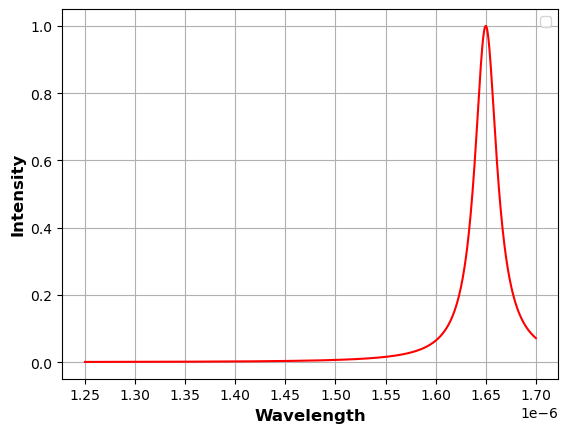

In [20]:
# 测试微环的谐振波长是否对准
wavelength_list = 1e-6 * np.linspace(1.25, 1.7, 1000)
frequency_list = []
for wl in wavelength_list:
    f = 3e8 / (2.34 * wl)
    frequency_list.append(f)
# phase_list = np.pi * np.linspace(0, 2, 100)
env = pt.Environment(t_start = 0, t_end = 1e-11, dt = 1e-12, wl = wavelength_list, grad=False, freqdomain=True)
with env:
    detected_through = []
    detected_drop = []
    ring = Ring(wavelength=1.65e-6, neff=3.4, phase=0, loss=0)
    detected = ring(source = 1)[-1, :, :, 0]
    detected_through = detected[:, 0]
    detected_drop = detected[:, 1]
    # 绘制波长-强度关系图
    # plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
    plt.plot(wavelength_list, np.array(detected_drop), 'r-')
    plt.xlabel("Wavelength", weight="bold", fontsize=12)
    plt.ylabel("Intensity", weight="bold", fontsize=12)
    plt.xticks(1e-6 * np.linspace(1.25, 1.7, 10))
    plt.legend()
    plt.grid()
    plt.show()

/var/folders/l4/lcfm8tb94pdfqjcvxpy0w0580000gn/T/ipykernel_97065/484866578.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


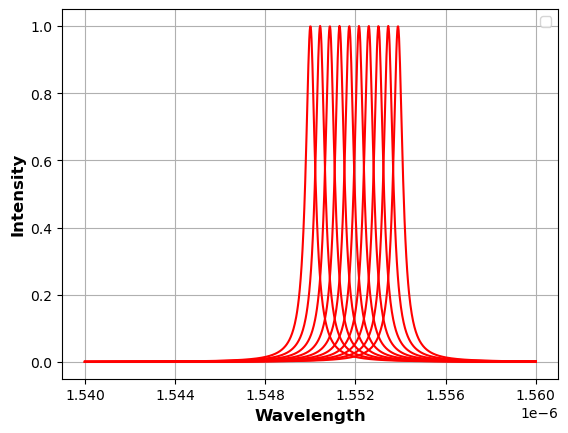

In [12]:
# 测试相移
wavelength_list = 1e-6 * np.linspace(1.54, 1.56, 1000)
phase_list = np.pi / 200 * np.linspace(0, 10, 10)
env = pt.Environment(t_start = 0, t_end = 1e-11, dt = 1e-12, wl = wavelength_list, grad=False, freqdomain=True)
for i in phase_list:
    with env:
        detected_through = []
        detected_drop = []
        ring = Ring(wavelength=1.55e-6, neff=3.4, phase=i, loss=0)
        detected = ring(source = 1)[-1, :, :, 0]
        detected_through = detected[:, 0]
        detected_drop = detected[:, 1]
        # 绘制波长-强度关系图
        # plt.plot(wavelength_list, np.array(detected_through), 'b-', label = "Through")
        plt.plot(wavelength_list, np.array(detected_drop), 'r-')

plt.xlabel("Wavelength", weight="bold", fontsize=12)
plt.ylabel("Intensity", weight="bold", fontsize=12)
plt.xticks(1e-6 * np.linspace(1.54, 1.56, 6))
plt.legend()
plt.grid()
plt.show()